In [12]:
import pandas as pd 
from sklearn import metrics

import matplotlib.pyplot as plt
import scikitplot as skplt

In [13]:
df = pd.read_csv('./data/sample_auth.csv')
df

,ad,authority
0,the european youth event is back in strasbourg...,1
1,learn the greatest tips tricks from the world...,1
2,live women leaders discuss how to accelerateeq...,1
3,if you love motorsport but work in another ind...,0
4,together we can turn the tide to protect our p...,0
...,...,...
103,it takes courage to take control of our life a...,0
104,experts from waseda university are advising ja...,1
105,a team of investigators from the rush universi...,1
106,you should recycle your jeansin the 4th episod...,1


In [17]:
# creating prediction model

# creating the filters 
filters =  ['expert', 'president','founder','ceo','teacher','police', 'government', 'school', 'college', 'universitie', 'journal',
             'companies','conclusive', 'decisive', 'approved', 'official', 'sanction', 'proven', 'technical', 
             'expert', 'skilful', 'proficient', 'adept', 'dr.', 'phd','state','researcher','professional','scientist','practitioner','academic',
             'authorities','reliable','union','nation','federal','department','scientist','professor',
             "administration","court","organization","university", "institution","bureau","center","agency","association","foundation" ,"commission",  
             'recognized', 'endorse', 'owner', 'mayor',  'unicef', 'sheriff', 'leader', 'judge', 'attorney',  'senior', 'senator', 'governor']

def contains_filter(x):
    for filter in filters:
        if filter in x:
            return 1
    return 0

def predict(X): 
    '''
        This function takes in a dataframe and returns the predicted values 
        params:
            X: dataframe
        returns:
            predicted values using the filters 
    '''
    X['prediction'] = X['ad'].apply(contains_filter)
    return X['prediction']


accuracy:   0.713
              precision    recall  f1-score   support

no-authority       0.69      0.76      0.73        54
   authority       0.73      0.67      0.70        54

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108

confusion matrix:
[[41 13]
 [18 36]]



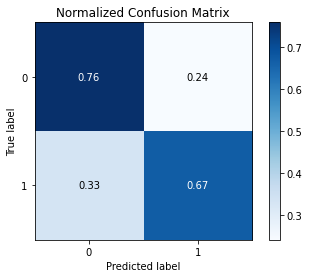

In [18]:
y_pred = predict(df)

# model performance
score = metrics.accuracy_score(df['authority'], y_pred)
print("accuracy:   %0.3f" % score)

print(metrics.classification_report(df['authority'], y_pred, target_names=['no-authority', 'authority']))

print("confusion matrix:")
print(metrics.confusion_matrix(df['authority'], y_pred))
print()

skplt.metrics.plot_confusion_matrix(df['authority'], y_pred, normalize=True)
plt.show()